In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

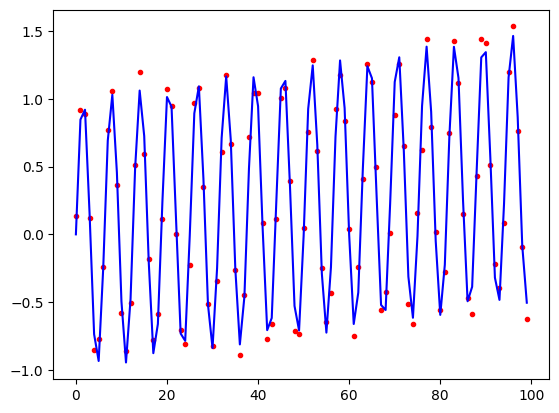

In [2]:
data_len = 1000

data_time_series = np.sin(np.arange(data_len)) + np.random.normal(0, 0.1, data_len) + np.arange(data_len)/200

plt.plot(data_time_series[0:100], 'r.')
plt.plot(range(100), np.sin(np.arange(100)) + np.arange(100)/200, 'b')
plt.show()

In [3]:
data_matrix = []
seq_len = 3

for i in range(0, data_len-seq_len):
  tmp_data = data_time_series[i:i+seq_len+1]
  data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(997, 4)
[[ 0.13308386  0.92027988  0.89142422  0.12021283]
 [ 0.92027988  0.89142422  0.12021283 -0.84976635]
 [ 0.89142422  0.12021283 -0.84976635 -0.77019549]
 ...
 [ 5.81054756  5.88963956  5.00460213  3.98017975]
 [ 5.88963956  5.00460213  3.98017975  4.16669577]
 [ 5.00460213  3.98017975  4.16669577  5.04670241]]


In [4]:
x = data_matrix_np[:, 0:seq_len]
y = data_matrix_np[:, seq_len]
print(x.shape)
print(y.shape)

n_train_data = 750

x_train = x[0:n_train_data, :]
y_train = y[0:n_train_data]
x_test = x[n_train_data:x.shape[0], :]
y_test = y[n_train_data:y.shape[0]]

(997, 3)
(997,)


In [7]:
from keras import layers, models

input_shape = (seq_len, )

mlp_seq = models.Sequential()
mlp_seq.add(layers.Dense(units = 5, activation = 'tanh', input_shape= input_shape))
mlp_seq.add(layers.Dense(units = 10, activation = 'tanh'))
mlp_seq.add(layers.Dense(units = 1, activation = 'linear'))

mlp_seq.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics=['mean_squared_error'])
mlp_seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 20        
                                                                 
 dense_4 (Dense)             (None, 10)                60        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = mlp_seq.fit(x_train, y_train, validation_data = [x_test, y_test], batch_size = 16, epochs = 100)

Epoch 1/100
47/47 [==============================] - 1s 7ms/step - loss: 5.0664 - mean_squared_error: 5.0664 - val_loss: 16.2458 - val_mean_squared_error: 16.2458
Epoch 2/100
47/47 [==============================] - 0s 3ms/step - loss: 2.6156 - mean_squared_error: 2.6156 - val_loss: 9.9388 - val_mean_squared_error: 9.9388
Epoch 3/100
47/47 [==============================] - 0s 3ms/step - loss: 1.5487 - mean_squared_error: 1.5487 - val_loss: 6.6933 - val_mean_squared_error: 6.6933
Epoch 4/100
47/47 [==============================] - 0s 3ms/step - loss: 1.1919 - mean_squared_error: 1.1919 - val_loss: 5.1769 - val_mean_squared_error: 5.1769
Epoch 5/100
47/47 [==============================] - 0s 4ms/step - loss: 1.0348 - mean_squared_error: 1.0348 - val_loss: 4.5772 - val_mean_squared_error: 4.5772
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: 0.9487 - mean_squared_error: 0.9487 - val_loss: 4.1914 - val_mean_squared_error: 4.1914
Epoch 7/100
47/47 [=============

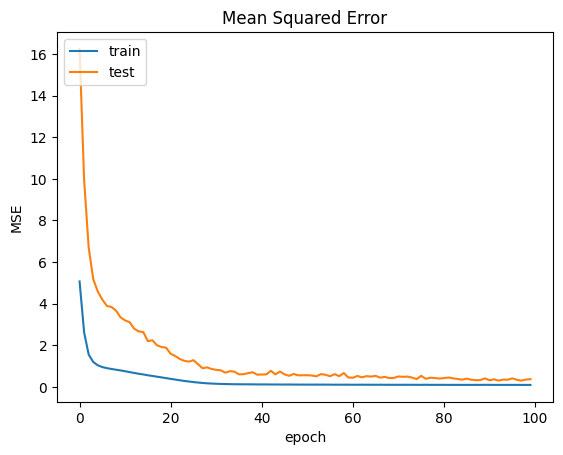

In [9]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

8/8 [==============================] - 0s 2ms/step


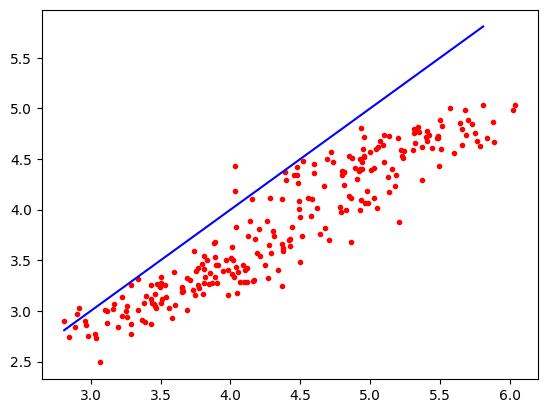

In [10]:
plt.plot(y_test, mlp_seq.predict(x_test), 'r.')
plt.plot(np.arange(min(y_test), max(y_test)), np.arange(min(y_test), max(y_test)), 'b')
plt.show()

8/8 [==============================] - 0s 2ms/step


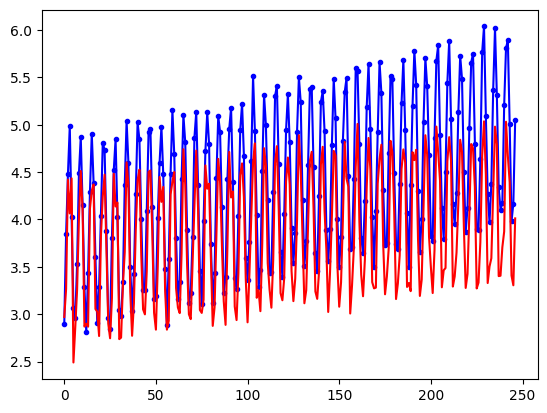

In [11]:
plt.plot(range(y_test.shape[0]), y_test, 'b.-')
plt.plot(range(y_test.shape[0]), mlp_seq.predict(x_test), 'r-')
plt.show()

In [12]:
rnn_sequence_len = 4
data_dim = 3

x = data_matrix_np[0:data_matrix_np.shape[0]-1, 0:data_dim]
y = data_matrix_np[0:data_matrix_np.shape[0]-1, data_dim]
print(x.shape)
print(y.shape)

x = np.reshape(x, (-1, rnn_sequence_len, data_dim))
y = np.reshape(y, (-1, rnn_sequence_len, 1))
print(x.shape)
print(y.shape)

(996, 3)
(996,)
(249, 4, 3)
(249, 4, 1)


In [13]:
n_train_data = 200

x_train = x[0:n_train_data, :]
y_train = y[0:n_train_data, :]
x_test = x[n_train_data:x.shape[0], :]
y_test = y[n_train_data:y.shape[0]]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 4, 3)
(49, 4, 3)
(200, 4, 1)
(49, 4, 1)


In [15]:
input_shape = (x_train[0].shape)

input = layers.Input(input_shape)
rnn_layer = layers.LSTM(10, return_sequences = True)(input)
output = layers.TimeDistributed(layers.Dense(1, activation = 'linear'))(rnn_layer)

rnn_func = models.Model(input, output)

rnn_func.compile(optimizer = 'Adam', loss='mean_squared_error', metrics = ['mean_squared_error'])
rnn_func.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 3)]            0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 10)             560       
                                                                 
 time_distributed_1 (TimeDis  (None, 4, 1)             11        
 tributed)                                                       
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = rnn_func.fit(x_train, y_train, validation_data = [x_test, y_test], batch_size = 16, epochs = 100)

Epoch 1/100
13/13 [==============================] - 6s 163ms/step - loss: 5.7291 - mean_squared_error: 5.7291 - val_loss: 19.3233 - val_mean_squared_error: 19.3233
Epoch 2/100
13/13 [==============================] - 0s 19ms/step - loss: 5.1388 - mean_squared_error: 5.1388 - val_loss: 17.7824 - val_mean_squared_error: 17.7824
Epoch 3/100
13/13 [==============================] - 0s 19ms/step - loss: 4.6065 - mean_squared_error: 4.6065 - val_loss: 16.3055 - val_mean_squared_error: 16.3055
Epoch 4/100
13/13 [==============================] - 0s 21ms/step - loss: 4.1092 - mean_squared_error: 4.1092 - val_loss: 14.9108 - val_mean_squared_error: 14.9108
Epoch 5/100
13/13 [==============================] - 0s 13ms/step - loss: 3.6657 - mean_squared_error: 3.6657 - val_loss: 13.6001 - val_mean_squared_error: 13.6001
Epoch 6/100
13/13 [==============================] - 0s 11ms/step - loss: 3.2661 - mean_squared_error: 3.2661 - val_loss: 12.3846 - val_mean_squared_error: 12.3846
Epoch 7/100
13/

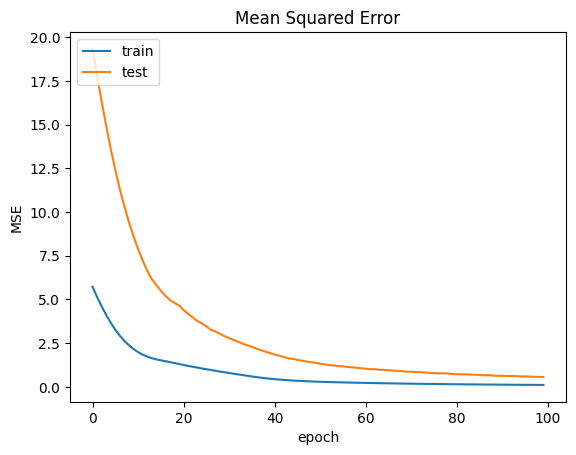

In [17]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

2/2 [==============================] - 1s 7ms/step


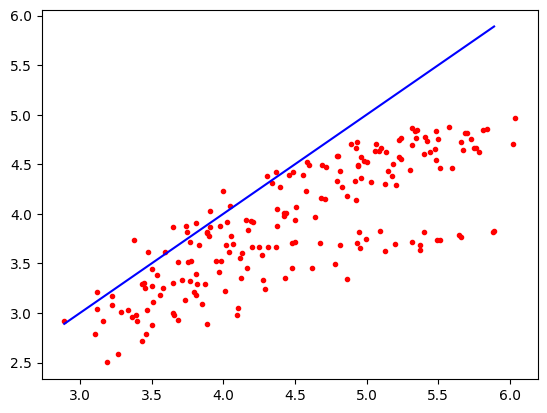

In [18]:
y_test_reshape = np.reshape(y_test, (-1, 1))
plt.plot(y_test_reshape, np.reshape(rnn_func.predict(x_test), (-1, 1)), 'r.')
plt.plot(np.arange(min(y_test_reshape), max(y_test_reshape)),
         np.arange(min(y_test_reshape), max(y_test_reshape)), 'b')
plt.show()

2/2 [==============================] - 0s 5ms/step


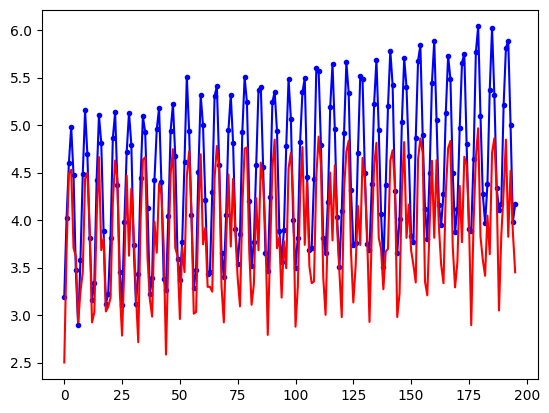

In [19]:
plt.plot(range(y_test_reshape.shape[0]), y_test_reshape, 'b.-')
plt.plot(range(y_test_reshape.shape[0]), np.reshape(rnn_func.predict(x_test), (-1,1)), 'r-')
plt.show()

In [20]:
data_matrix = []

for i in range(0, data_len-data_dim*rnn_sequence_len):
  tmp_data = data_time_series[i:i+data_dim*rnn_sequence_len+1]
  data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(988, 13)
[[ 0.13308386  0.92027988  0.89142422 ... -0.58066601 -0.86247778
  -0.50899564]
 [ 0.92027988  0.89142422  0.12021283 ... -0.86247778 -0.50899564
   0.51220625]
 [ 0.89142422  0.12021283 -0.84976635 ... -0.50899564  0.51220625
   1.199213  ]
 ...
 [ 3.97018441  4.37427448  5.37073376 ...  5.88963956  5.00460213
   3.98017975]
 [ 4.37427448  5.37073376  6.02180055 ...  5.00460213  3.98017975
   4.16669577]
 [ 5.37073376  6.02180055  5.31445476 ...  3.98017975  4.16669577
   5.04670241]]


In [21]:
x = data_matrix_np[0:data_matrix_np.shape[0]-1, 0:data_dim*rnn_sequence_len]
y = data_matrix_np[0:data_matrix_np.shape[0]-1, data_dim*rnn_sequence_len]
print(x.shape)
print(y.shape)

x = np.reshape(x, (-1, rnn_sequence_len, data_dim))
print(x.shape)

(987, 12)
(987,)
(987, 4, 3)


In [22]:
n_train_data = 750

x_train = x[0:n_train_data, :]
y_train = y[0:n_train_data]
x_test = x[n_train_data:x.shape[0], :]
y_test = y[n_train_data:y.shape[0]]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 4, 3)
(237, 4, 3)
(750,)
(237,)


In [26]:
input_shape = (x_train[0].shape)

input = layers.Input(input_shape)
rnn_layer = layers.LSTM(10, return_sequences=False)(input)
output = layers.Dense(1, activation='linear')(rnn_layer)

rnn_mto1_func = models.Model(input, output)

rnn_mto1_func.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])
rnn_mto1_func.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 4, 3)]            0         
                                                                 
 lstm_3 (LSTM)               (None, 10)                560       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = rnn_mto1_func.fit(x_train, y_train, validation_data = [x_test, y_test], batch_size = 16, epochs =100)

Epoch 1/100
47/47 [==============================] - 3s 17ms/step - loss: 5.8084 - mean_squared_error: 5.8084 - val_loss: 17.8525 - val_mean_squared_error: 17.8525
Epoch 2/100
47/47 [==============================] - 0s 9ms/step - loss: 2.5826 - mean_squared_error: 2.5826 - val_loss: 7.8415 - val_mean_squared_error: 7.8415
Epoch 3/100
47/47 [==============================] - 0s 9ms/step - loss: 1.0780 - mean_squared_error: 1.0780 - val_loss: 4.0493 - val_mean_squared_error: 4.0493
Epoch 4/100
47/47 [==============================] - 0s 8ms/step - loss: 0.8146 - mean_squared_error: 0.8146 - val_loss: 3.0898 - val_mean_squared_error: 3.0898
Epoch 5/100
47/47 [==============================] - 0s 8ms/step - loss: 0.6907 - mean_squared_error: 0.6907 - val_loss: 2.3759 - val_mean_squared_error: 2.3759
Epoch 6/100
47/47 [==============================] - 0s 8ms/step - loss: 0.5985 - mean_squared_error: 0.5985 - val_loss: 2.0014 - val_mean_squared_error: 2.0014
Epoch 7/100
47/47 [============

In [ ]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

8/8 [==============================] - 1s 4ms/step


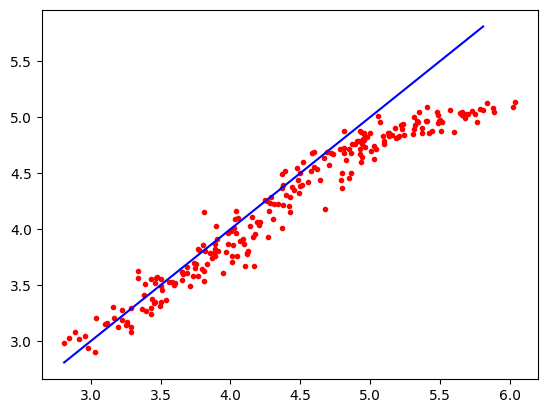

In [29]:
plt.plot(y_test, rnn_mto1_func.predict(x_test), 'r.')
plt.plot(np.arange(min(y_test), max(y_test)),
         np.arange(min(y_test), max(y_test)), 'b')
plt.show()

8/8 [==============================] - 0s 3ms/step


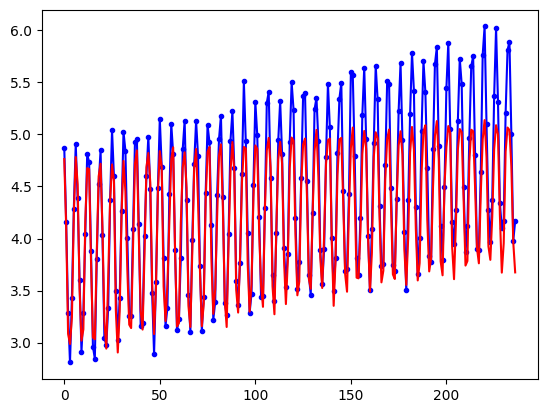

In [30]:
plt.plot(range(y_test.shape[0]), y_test, 'b.-')
plt.plot(range(y_test.shape[0]), rnn_mto1_func.predict(x_test), 'r-')
plt.show()